In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_kindey = pd.read_csv('kindey stone urine analysis.csv')
df_kindey

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [3]:
df_kindey.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [4]:
df_kindey.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [5]:
df_kindey.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


0    45
1    34
Name: target, dtype: int64


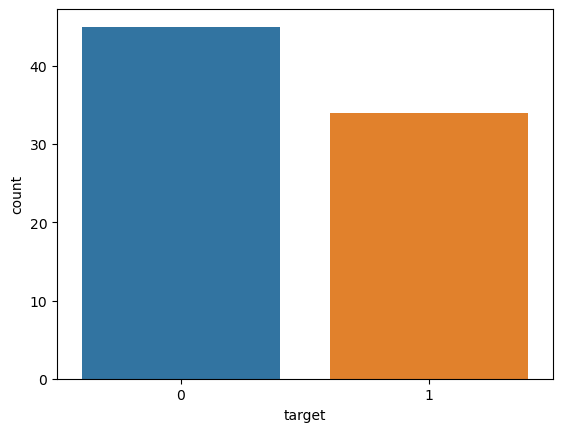

In [6]:
y = df_kindey["target"]

sns.countplot(y)


target_temp = df_kindey.target.value_counts()

print(target_temp)

In [7]:
from sklearn.model_selection import train_test_split

predictors = df_kindey.drop("target",axis=1)
target = df_kindey["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 81.25 %


In [10]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 93.75 %


In [11]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 8888)
model_lgbm.fit(X_train, Y_train) 
Y_pred_lgbm = model_lgbm.predict(X_test) 
score_lgbm = round(accuracy_score(Y_pred_lgbm,Y_test)*100,2)

print("The accuracy score achieved using LightGBM is: "+str(score_lgbm)+" %")

The accuracy score achieved using LightGBM is: 87.5 %


In [12]:
scores = [score_lr,score_xgb,score_lgbm]
algorithms = ["Logistic Regression","XGBoost","LightGBM"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.25 %
The accuracy score achieved using XGBoost is: 93.75 %
The accuracy score achieved using LightGBM is: 87.5 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

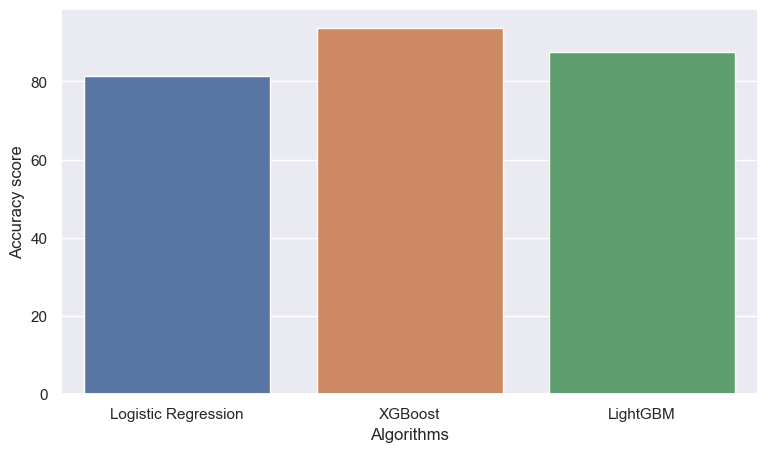

In [13]:
sns.set(rc={'figure.figsize':(9,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [18]:
import pickle

pickle.dump(xgb_model,open('xgmodel.pkl','wb'))

In [19]:
data = np.array([[1.045,9.1,825,20,372,5.45]])
my_prediction = xgb_model.predict(data)
print(my_prediction)

[1]
